In [1]:
# Install the library
%pip install pythae
#install tochvision via :"pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

%load_ext autoreload
%autoreload 2

In [2]:
mnist_trainset = datasets.MNIST(root='/users/2024/ds2/119008303/Documents/ProjetDeepG/data', train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

In [3]:
print(len(train_dataset[0][0][0]),len(train_dataset[0][0]),len(train_dataset[0]))

28 28 1


In [9]:
train_dataset.shape

torch.Size([50000, 1, 28, 28])

In [4]:
mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28)

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        ...,


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
         

In [9]:
from pythae.models import AE, AEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.mnist import Encoder_ResNet_AE_MNIST, Decoder_ResNet_AE_MNIST

/users/2024/ds2/119008303/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_epochs=10, # Change this to train the model a bit more
)


model_config = AEConfig(
    input_dim=(1, 28, 28),
    latent_dim=16
)

model = AE(
    model_config=model_config,
    encoder=Encoder_ResNet_AE_MNIST(model_config), 
    decoder=Decoder_ResNet_AE_MNIST(model_config) 
)

In [11]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [12]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !
Ready for training.

Created my_model folder since did not exist.

Created my_model/AE_training_2023-11-17_11-54-11. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 10
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
Scheduler: None

Successfully launched training !

Eval of epoch 1/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 97.99batch/s]
--------------------------------------------------------------------------
Train loss: 40.8168
Eval loss: 17.4184
---

Eval of epoch 7/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 94.43batch/s]
--------------------------------------------------------------------------
Train loss: 7.3234
Eval loss: 7.2452
--------------------------------------------------------------------------
Eval of epoch 8/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 95.84batch/s]
--------------------------------------------------------------------------
Train loss: 7.0182
Eval loss: 7.0501
--------------------------------------------------------------------------
Eval of epoch 9/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 95.23batch/s]
--------------------------------------------------------------------------
Train loss: 6.7642
Eval loss: 6.7935
--------------------------------------------------------------------------
Eval of epoch 10/10: 100%|████████████████████████████████████████████

In [13]:
import os
from pythae.models import AutoModel

In [14]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [15]:
from pythae.samplers import NormalSampler

In [16]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [17]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [18]:
import matplotlib.pyplot as plt

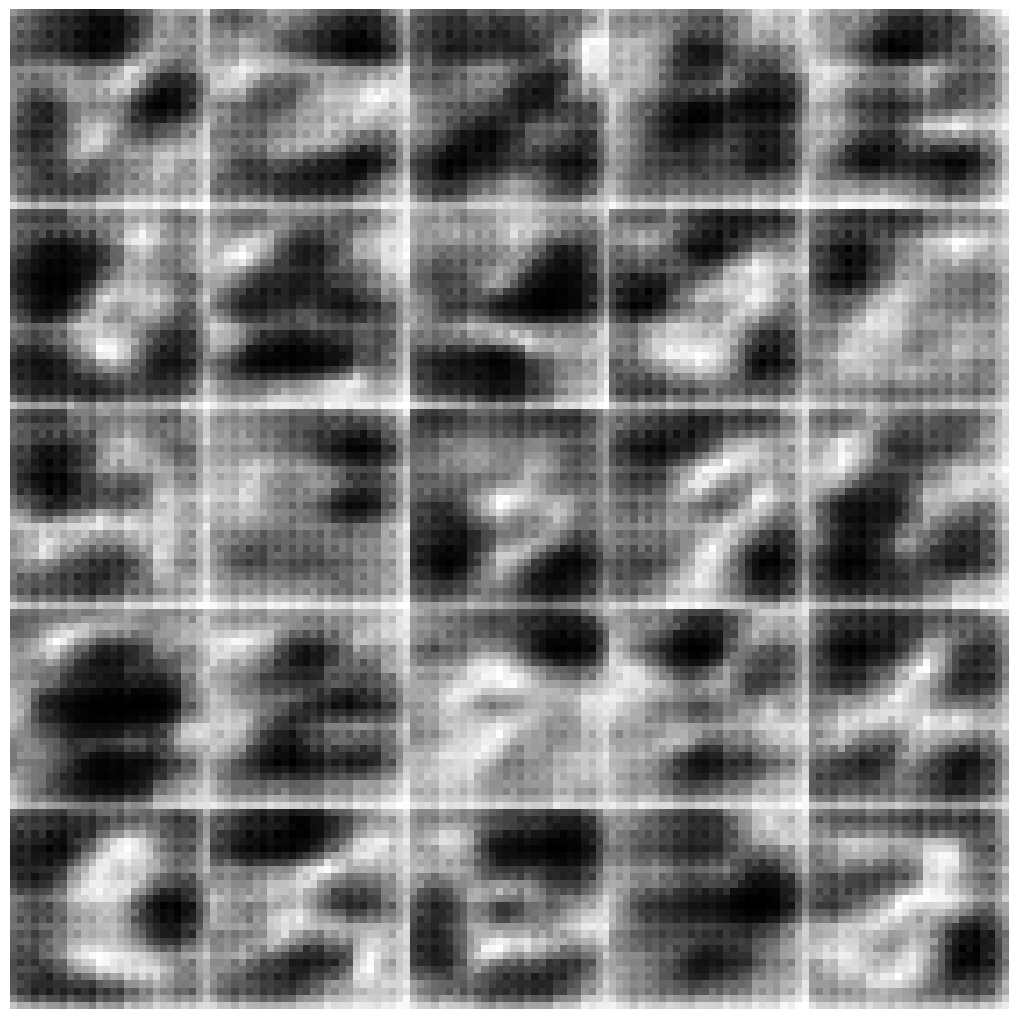

In [19]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [20]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

In [21]:
# set up GMM sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

In [22]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

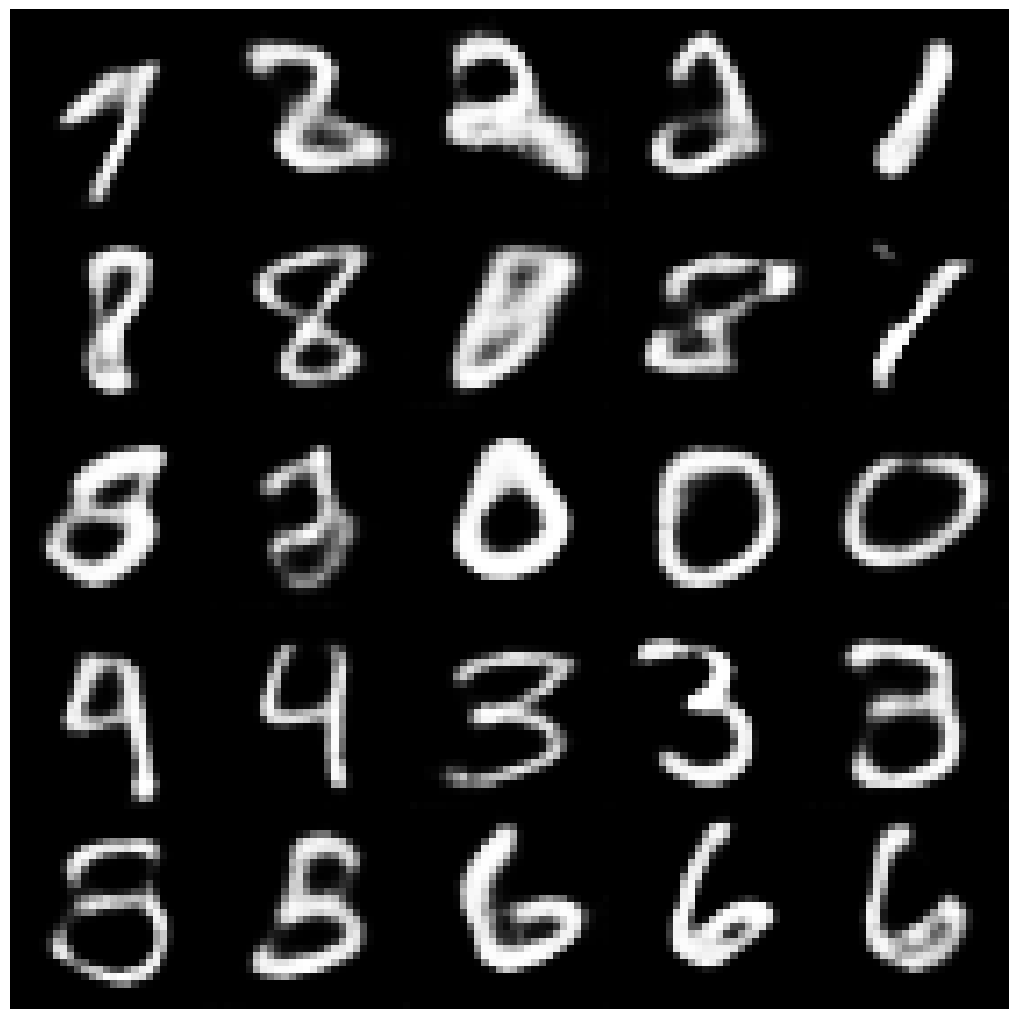

In [23]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [24]:
reconstructions = trained_model.reconstruct(eval_dataset[:25].to(device)).detach().cpu()

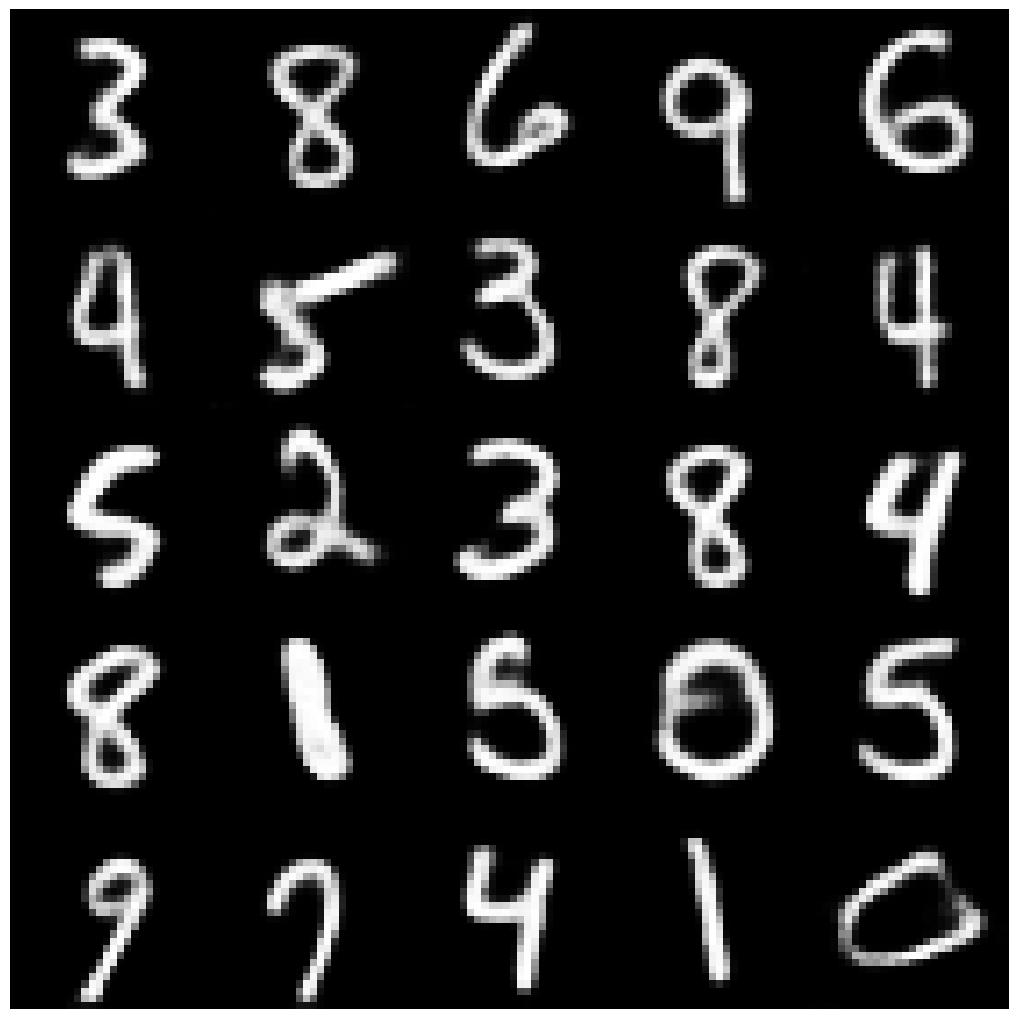

In [25]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

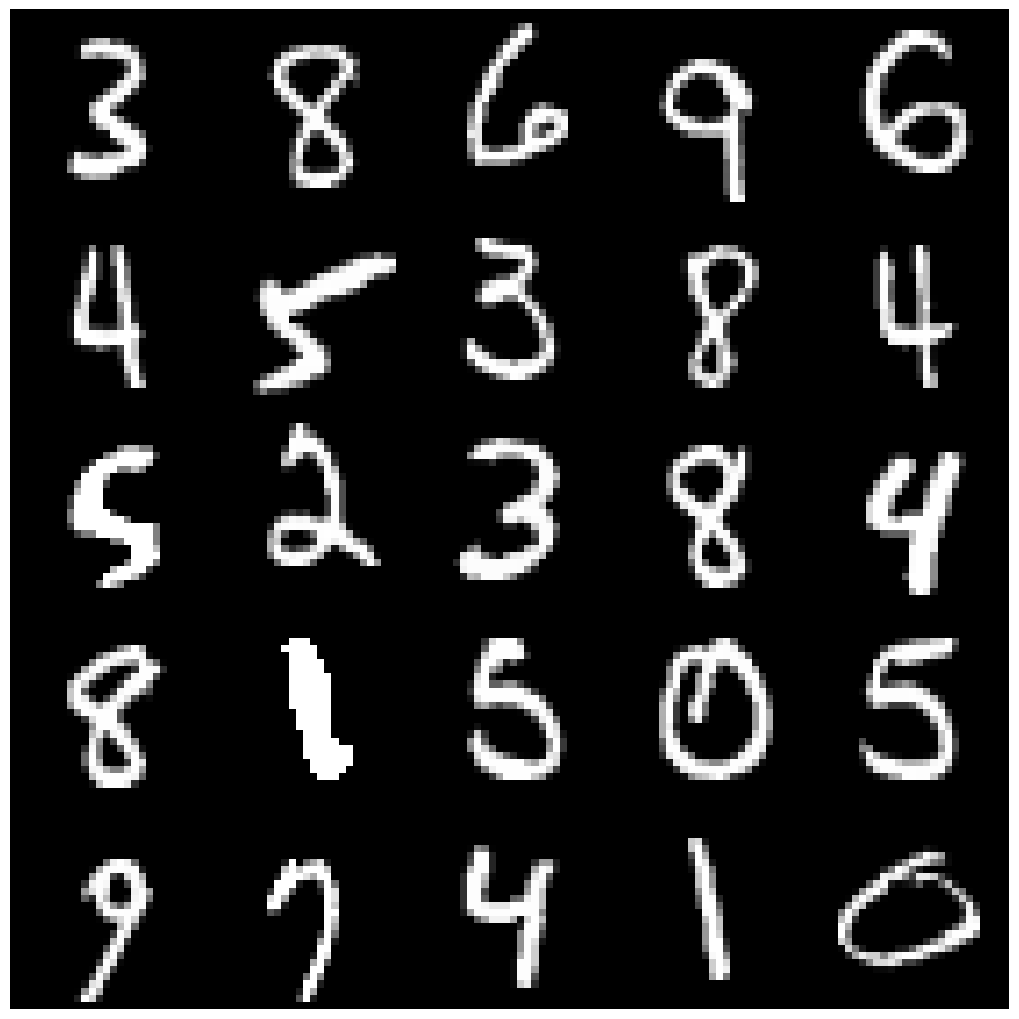

In [26]:
# show the true data
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [27]:
interpolations = trained_model.interpolate(eval_dataset[:5].to(device), eval_dataset[5:10].to(device), granularity=10).detach().cpu()

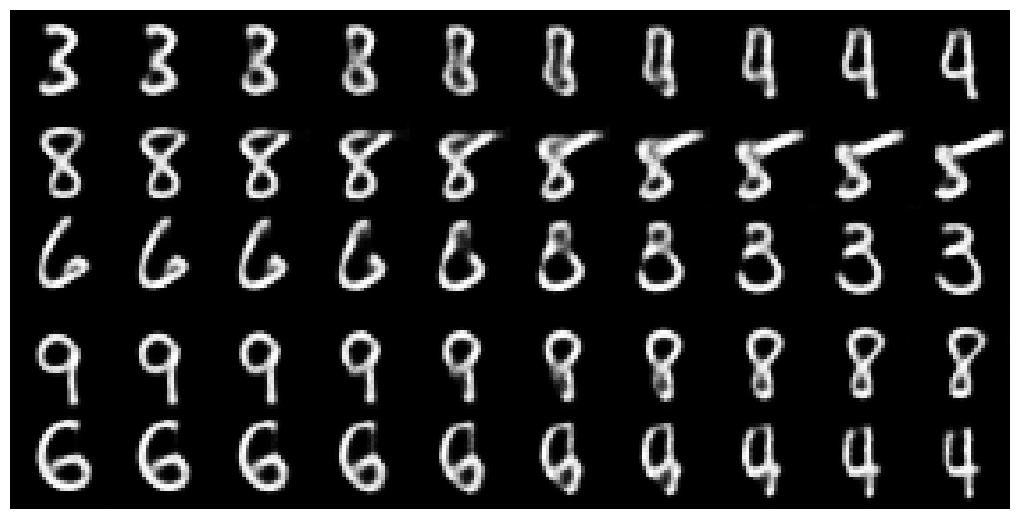

In [28]:
# show interpolations
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        axes[i][j].imshow(interpolations[i, j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [31]:
celeba_trainset = datasets.CelebA(root='/users/2024/ds2/119008303/Documents/ProjetDeepG/data', split='train', download=True, transform=None)

train_dataset = celeba_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = celeba_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

RuntimeError: The daily quota of the file img_align_celeba.zip is exceeded and it can't be downloaded. This is a limitation of Google Drive and can only be overcome by trying again later.